In [4]:
import tensorflow as tf
from tensorflow import keras


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
y_train_full.shape

(60000,)

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
#extracting validation data from full train data + scaling down
 
X_valid, X_train=X_train_full[ :5000]/255 , X_train_full[5000:]/255
y_valid,y_train=y_train_full[ :5000] , y_train_full[5000:]
X_test=X_test/255

In [11]:
len(X_valid)

5000

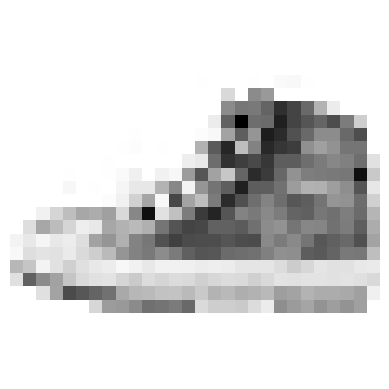

In [12]:
plt.imshow(X_train[2] ,cmap='binary')
plt.axis('off')
plt.show()

In [13]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [14]:
len(y_train)

55000

In [15]:
y_train[0]

np.uint8(4)

In [16]:
class_names=["T-shirt/top" , "Trouser" , "Pullover" , "Dress", "Coat","Sandal",
             "Shirt","Sneaker", "Bag" ,"Ankle boot" ]

In [17]:
class_names[y_train[2]]

'Sneaker'

In [18]:
X_valid.shape

(5000, 28, 28)

In [19]:
X_test.shape

(10000, 28, 28)

In [20]:
#training ki ready
#architecture prep

model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation= "softmax"))


c:\Users\Nanditha\Desktop\Neural Networks - projects\myenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


In [22]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
keras.utils.plot_model(model, "my_fashion_minist.png" ,show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [25]:
#defining loss and specifying Optimiser

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD() ,
              metrics=["accuracy"])

In [ ]:
#now we are ready to train NN

history=model.fit(X_train,y_train, epochs=20,
          validation_data= (X_valid,y_valid))

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 76s 8ms/step - accuracy: 0.7078 - loss: 0.9528 - val_accuracy: 0.8224 - val_loss: 0.5205
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8241 - loss: 0.4990 - val_accuracy: 0.8438 - val_loss: 0.4614
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8423 - loss: 0.4472 - val_accuracy: 0.8552 - val_loss: 0.4290
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8527 - loss: 0.4170 - val_accuracy: 0.8626 - val_loss: 0.4065
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8592 - loss: 0.3959 - val_accuracy: 0.8674 - val_loss: 0.3887
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8645 - loss: 0.3795 - val_accuracy: 0.8700 - val_loss: 0.3777
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8691 - loss: 0.3660 - val_accuracy: 0.8712 - val_loss: 0.3691
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8728 - loss: 0.3544 -

In [ ]:
history.params

: 

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

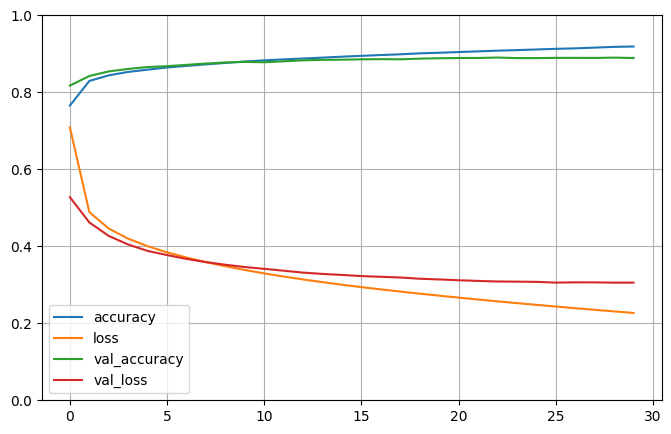

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [ ]:
#Testing
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8847 - loss: 0.7826


[0.7698659896850586, 0.8881000280380249]

In [ ]:
#test samples

X_new=X_test[:3]

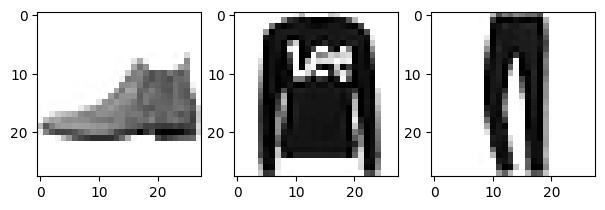

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
y_pred=np.argmax(model.predict(X_new) ,axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')